In [4]:
library(plm)

Loading required package: Formula


In [6]:
data = read.csv("data/PFP_nozero_covariates_30cm.csv")
data[["Country"]] = factor("China")
head(data)

X             PFP_N    Year Province  Rural_popu Irri_area GDP_agriculture
1 1978Anhui     38.85465 1978 Anhui     5.144231   0.2940456  729.1258      
2 1978Beijing   34.83250 1978 Beijing   5.439378   0.4864692 3423.6337      
3 1978Fujian    44.11323 1978 Fujian    7.374163   0.3006588  983.6866      
4 1978Gansu     21.24887 1978 Gansu     4.520054   0.2401786  508.3934      
5 1978Guangdong 38.08682 1978 Guangdong 6.297277   0.2872174  798.3183      
6 1978Guangxi   35.78967 1978 Guangxi   5.581323   0.2700360  815.4309      
  Farmer_income Inorganic_F_output Large_medium_tractors ⋯ Calcisols Cryosols  
1 184.82         32.37834          1.917067              ⋯ 10.379076 0.16302126
2 290.46        145.20193          7.926317              ⋯  1.179766 0.01222295
3 171.74         46.01227          2.076827              ⋯ 16.674904 0.36711958
4 153.33         42.81208          3.896744              ⋯  4.648438 0.21465848
5 274.37         48.99717          2.406634              ⋯  6.359974 0.33896829
6 173.68         34.33587          3.749220              ⋯  9.762604 0.49623444
  Fluvisols  Leptosols Lixisols  Phaeozems  Umbrisols  Stagnosols Durisols
1 0.08926932 14.831737  6.052155 13.8230776 0.02692309 4.2122371  3.661931
2 0.46807018 10.999683 30.497307  7.9885519 0.32267867 0.1850711  2.876233
3 0.06521634  2.428367  8.037215  0.7639250 0.08504686 1.1649576  5.879578
4 7.49200999  6.429372 17.396262  2.2732878 0.02366767 0.3898247  2.239064
5 0.06547605  8.821494  6.325334  1.7032188 0.04174332 1.9523546  4.023609
6 0.12975460  4.502822  6.561313  0.5694741 0.08108143 0.9923823  5.263071
  Country
1 China  
2 China  
3 China  
4 China  
5 China  
6 China

In [8]:
fullformula = PFP_N ~ . - X - Year - Province - Country
pdata1 = pdata.frame(data, index=c("Province", "Year"))
str(pdata1)

Classes ‘pdata.frame’ and 'data.frame':	1159 obs. of  114 variables:
 $ X                               : Factor w/ 1159 levels "1978Anhui","1978Beijing",..: 1 31 61 91 121 151 181 211 241 271 ...
  ..- attr(*, "names")= chr  "Anhui-1978" "Anhui-1979" "Anhui-1980" "Anhui-1981" ...
  ..- attr(*, "index")=Classes ‘pindex’ and 'data.frame':	1159 obs. of  2 variables:
  .. ..$ Province: Factor w/ 31 levels "Anhui","Beijing",..: 1 1 1 1 1 1 1 1 1 1 ...
  .. ..$ Year    : Factor w/ 38 levels "1978","1979",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ PFP_N                           : 'pseries' Named num  38.9 34.4 27.9 28.3 26.7 ...
  ..- attr(*, "names")= chr  "Anhui-1978" "Anhui-1979" "Anhui-1980" "Anhui-1981" ...
  ..- attr(*, "index")=Classes ‘pindex’ and 'data.frame':	1159 obs. of  2 variables:
  .. ..$ Province: Factor w/ 31 levels "Anhui","Beijing",..: 1 1 1 1 1 1 1 1 1 1 ...
  .. ..$ Year    : Factor w/ 38 levels "1978","1979",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Year                            : Facto

In [15]:
m1 = lm(PFP_N ~ . - X - Year - Province - Ferralsols, data[,-which(names(data) == "Country")])
summary(m1)


Call:
lm(formula = PFP_N ~ . - X - Year - Province - Ferralsols, data = data[, 
    -which(names(data) == "Country")])

Residuals:
     Min       1Q   Median       3Q      Max 
-18.9019  -2.4609  -0.1803   2.2287  23.1305 

Coefficients: (44 not defined because of singularities)
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      -1.189e+04  2.182e+04  -0.545 0.586031    
Rural_popu                       -1.518e+00  1.510e-01 -10.058  < 2e-16 ***
Irri_area                        -2.159e+01  3.500e+00  -6.169 9.64e-10 ***
GDP_agriculture                   3.693e-04  6.233e-05   5.926 4.16e-09 ***
Farmer_income                    -4.255e-04  1.724e-04  -2.468 0.013729 *  
Inorganic_F_output                8.142e-04  3.408e-04   2.389 0.017060 *  
Large_medium_tractors            -2.163e-02  1.961e-02  -1.103 0.270104    
Small_tractors                    4.297e-02  6.537e-03   6.572 7.64e-11 ***
Towing_Farm_Machinery_LM          6

In [11]:
fullformula

PFP_N ~ . - X - Year - Province - Country

In [16]:
soils = data[,which(names(data) == "Ferralsols"):which(names(data) == "Durisols")]

In [17]:
rowSums(soils)

[1] 103.74405 143.98528 152.42899 126.13921 145.81596 142.85190 127.59051
   [8] 124.55159 135.43890  96.70278 118.63882 113.37198 152.97882 114.23234
  [15] 102.43930 156.00962 125.69748 107.19488 142.48023  84.76510 147.36095
  [22] 117.14814  94.50070 159.44234 100.83542 111.74709  69.70534 112.63264
  [29]  94.82313 142.78380 103.74405 143.98528 152.42899 126.13921 145.81596
  [36] 142.85190 127.59051 124.55159 135.43890  96.70278 118.63882 113.37198
  [43] 152.97882 114.23234 102.43930 156.00962 125.69748 107.19488 142.48023
  [50]  84.76510 147.36095 117.14814  94.50070 159.44234 100.83542 111.74709
  [57]  69.70534 112.63264  94.82313 142.78380 103.74405 143.98528 152.42899
  [64] 126.13921 145.81596 142.85190 127.59051 124.55159 135.43890  96.70278
  [71] 118.63882 113.37198 152.97882 114.23234 102.43930 156.00962 125.69748
  [78] 107.19488 142.48023  84.76510 147.36095 117.14814  94.50070 159.44234
  [85] 100.83542 111.74709  69.70534 112.63264  94.82313 142.78380 103.74405
  [92] 143.98528 152.42899 126.13921 145.81596 142.85190 127.59051 124.55159
  [99] 135.43890  96.70278 118.63882 113.37198 152.97882 114.23234 102.43930
 [106] 156.00962 125.69748 107.19488 142.48023  84.76510 147.36095 117.14814
 [113]  94.50070 159.44234 100.83542 111.74709  69.70534 112.63264  94.82313
 [120] 142.78380 103.74405 143.98528 152.42899 126.13921 145.81596 142.85190
 [127] 127.59051 124.55159 135.43890  96.70278 118.63882 113.37198 152.97882
 [134] 114.23234 102.43930 156.00962 125.69748 107.19488 142.48023  84.76510
 [141] 147.36095 117.14814  94.50070 159.44234 100.83542 111.74709  69.70534
 [148] 112.63264  94.82313 142.78380 103.74405 143.98528 152.42899 126.13921
 [155] 145.81596 142.85190 127.59051 124.55159 135.43890  96.70278 118.63882
 [162] 113.37198 152.97882 114.23234 102.43930 156.00962 125.69748 107.19488
 [169] 142.48023  84.76510 147.36095 117.14814  94.50070 159.44234 100.83542
 [176] 111.74709  69.70534 112.63264  94.82313 142.78380 103.74405 143.98528
 [183] 152.42899 126.13921 145.81596 142.85190 127.59051 124.55159 135.43890
 [190]  96.70278 118.63882 113.37198 152.97882 114.23234 102.43930 156.00962
 [197] 125.69748 107.19488 142.48023  84.76510 147.36095 117.14814  94.50070
 [204] 159.44234 100.83542 111.74709  69.70534 112.63264  94.82313 142.78380
 [211] 103.74405 143.98528 152.42899 126.13921 145.81596 142.85190 127.59051
 [218] 124.55159 135.43890  96.70278 118.63882 113.37198 152.97882 114.23234
 [225] 102.43930 156.00962 125.69748 107.19488 142.48023  84.76510 147.36095
 [232] 117.14814  94.50070 159.44234 100.83542 111.74709  69.70534 112.63264
 [239]  94.82313 142.78380 103.74405 143.98528 152.42899 126.13921 145.81596
 [246] 142.85190 127.59051 124.55159 135.43890  96.70278 118.63882 113.37198
 [253] 152.97882 114.23234 102.43930 156.00962 125.69748 107.19488 142.48023
 [260]  84.76510 147.36095 117.14814  94.50070 159.44234 100.83542 111.74709
 [267]  69.70534 112.63264  94.82313 142.78380 103.74405 143.98528 152.42899
 [274] 126.13921 145.81596 142.85190 127.59051 124.55159 135.43890  96.70278
 [281] 118.63882 113.37198 152.97882 114.23234 102.43930 156.00962 125.69748
 [288] 107.19488 142.48023  84.76510 147.36095 117.14814  94.50070 159.44234
 [295] 100.83542 111.74709  69.70534 112.63264  94.82313 142.78380 103.74405
 [302] 143.98528 152.42899 126.13921 145.81596 142.85190 127.59051 124.55159
 [309] 135.43890  96.70278 118.63882 113.37198 152.97882 114.23234 102.43930
 [316] 156.00962 125.69748 107.19488 142.48023  84.76510 147.36095 117.14814
 [323]  94.50070 159.44234 100.83542 111.74709  69.70534 112.63264  94.82313
 [330] 142.78380 103.74405 143.98528 152.42899 126.13921 145.81596 142.85190
 [337] 127.59051 124.55159 135.43890  96.70278 118.63882 113.37198 152.97882
 [344] 114.23234 102.43930 156.00962 125.69748 107.19488 142.48023  84.76510
 [351] 147.36095 117.14814  94.50070 159.44234 100.83542 111.74709  69.70534
 [358] 112.63264  94.82313 142.78380 103.74405 143.98528 152.42899 126.13921

In [18]:
rowMeans(soils)

[1] 3.458135 4.799509 5.080966 4.204640 4.860532 4.761730 4.253017 4.151720
   [9] 4.514630 3.223426 3.954627 3.779066 5.099294 3.807745 3.414643 5.200321
  [17] 4.189916 3.573163 4.749341 2.825503 4.912032 3.904938 3.150023 5.314745
  [25] 3.361181 3.724903 2.323511 3.754421 3.160771 4.759460 3.458135 4.799509
  [33] 5.080966 4.204640 4.860532 4.761730 4.253017 4.151720 4.514630 3.223426
  [41] 3.954627 3.779066 5.099294 3.807745 3.414643 5.200321 4.189916 3.573163
  [49] 4.749341 2.825503 4.912032 3.904938 3.150023 5.314745 3.361181 3.724903
  [57] 2.323511 3.754421 3.160771 4.759460 3.458135 4.799509 5.080966 4.204640
  [65] 4.860532 4.761730 4.253017 4.151720 4.514630 3.223426 3.954627 3.779066
  [73] 5.099294 3.807745 3.414643 5.200321 4.189916 3.573163 4.749341 2.825503
  [81] 4.912032 3.904938 3.150023 5.314745 3.361181 3.724903 2.323511 3.754421
  [89] 3.160771 4.759460 3.458135 4.799509 5.080966 4.204640 4.860532 4.761730
  [97] 4.253017 4.151720 4.514630 3.223426 3.954627 3.779066 5.099294 3.807745
 [105] 3.414643 5.200321 4.189916 3.573163 4.749341 2.825503 4.912032 3.904938
 [113] 3.150023 5.314745 3.361181 3.724903 2.323511 3.754421 3.160771 4.759460
 [121] 3.458135 4.799509 5.080966 4.204640 4.860532 4.761730 4.253017 4.151720
 [129] 4.514630 3.223426 3.954627 3.779066 5.099294 3.807745 3.414643 5.200321
 [137] 4.189916 3.573163 4.749341 2.825503 4.912032 3.904938 3.150023 5.314745
 [145] 3.361181 3.724903 2.323511 3.754421 3.160771 4.759460 3.458135 4.799509
 [153] 5.080966 4.204640 4.860532 4.761730 4.253017 4.151720 4.514630 3.223426
 [161] 3.954627 3.779066 5.099294 3.807745 3.414643 5.200321 4.189916 3.573163
 [169] 4.749341 2.825503 4.912032 3.904938 3.150023 5.314745 3.361181 3.724903
 [177] 2.323511 3.754421 3.160771 4.759460 3.458135 4.799509 5.080966 4.204640
 [185] 4.860532 4.761730 4.253017 4.151720 4.514630 3.223426 3.954627 3.779066
 [193] 5.099294 3.807745 3.414643 5.200321 4.189916 3.573163 4.749341 2.825503
 [201] 4.912032 3.904938 3.150023 5.314745 3.361181 3.724903 2.323511 3.754421
 [209] 3.160771 4.759460 3.458135 4.799509 5.080966 4.204640 4.860532 4.761730
 [217] 4.253017 4.151720 4.514630 3.223426 3.954627 3.779066 5.099294 3.807745
 [225] 3.414643 5.200321 4.189916 3.573163 4.749341 2.825503 4.912032 3.904938
 [233] 3.150023 5.314745 3.361181 3.724903 2.323511 3.754421 3.160771 4.759460
 [241] 3.458135 4.799509 5.080966 4.204640 4.860532 4.761730 4.253017 4.151720
 [249] 4.514630 3.223426 3.954627 3.779066 5.099294 3.807745 3.414643 5.200321
 [257] 4.189916 3.573163 4.749341 2.825503 4.912032 3.904938 3.150023 5.314745
 [265] 3.361181 3.724903 2.323511 3.754421 3.160771 4.759460 3.458135 4.799509
 [273] 5.080966 4.204640 4.860532 4.761730 4.253017 4.151720 4.514630 3.223426
 [281] 3.954627 3.779066 5.099294 3.807745 3.414643 5.200321 4.189916 3.573163
 [289] 4.749341 2.825503 4.912032 3.904938 3.150023 5.314745 3.361181 3.724903
 [297] 2.323511 3.754421 3.160771 4.759460 3.458135 4.799509 5.080966 4.204640
 [305] 4.860532 4.761730 4.253017 4.151720 4.514630 3.223426 3.954627 3.779066
 [313] 5.099294 3.807745 3.414643 5.200321 4.189916 3.573163 4.749341 2.825503
 [321] 4.912032 3.904938 3.150023 5.314745 3.361181 3.724903 2.323511 3.754421
 [329] 3.160771 4.759460 3.458135 4.799509 5.080966 4.204640 4.860532 4.761730
 [337] 4.253017 4.151720 4.514630 3.223426 3.954627 3.779066 5.099294 3.807745
 [345] 3.414643 5.200321 4.189916 3.573163 4.749341 2.825503 4.912032 3.904938
 [353] 3.150023 5.314745 3.361181 3.724903 2.323511 3.754421 3.160771 4.759460
 [361] 3.458135 4.799509 5.080966 4.204640 4.860532 4.761730 4.253017 4.151720
 [369] 4.514630 3.223426 3.954627 3.779066 5.099294 3.807745 3.414643 5.200321
 [377] 4.189916 3.573163 4.749341 2.825503 4.912032 3.904938 3.150023 5.314745
 [385] 3.361181 3.724903 2.323511 3.754421 3.160771 4.759460 3.458135 4.799509
 [393] 5.080966 4.204640 4.860532 4.761730 4.253017 4.151720 4.514630 3.223426
 [401] 3.954627 3.779066 5.099294 3.807745 3.414643 5

In [20]:
alias(m1)

Model :
PFP_N ~ (X + Year + Province + Rural_popu + Irri_area + GDP_agriculture + 
    Farmer_income + Inorganic_F_output + Large_medium_tractors + 
    Small_tractors + Towing_Farm_Machinery_LM + Towing_Farm_Machinery_S + 
    Electronic_engines + Diesel_engines + Combine_harvesters + 
    Motorized_threshing_machines + Cereal + Beans + Tubers + 
    Oil + Sugar + Fiber + Tobacco + Vegetables + Tea + Orchards + 
    Melons + Bulk_density30cm + CEC30cm + Clay_content30cm + 
    Coarse_fragments_volumetric30cm + SOC_density30cm + SOC_content30cm + 
    pH_H2O30cm + PH_KCl30cm + Silt_content30cm + Sand_content30cm + 
    Available_soil_water_h1_30cm + Available_soil_water_h2_30cm + 
    Available_soil_water_h3_30cm + Available_soil_water_wilting30cm + 
    Saturated_water_content30cm + SOC_stock30cm + Depth_bedrock200cm + 
    Absolute_depth_bedrock + Histosols_probability_cumulative + 
    Sodic_soil_grade + Acid_sub.soils_grade + TAXNWRB_250m_ll.tif + 
    local_downslope_curvature + l

In [22]:
str(data)

'data.frame':	1159 obs. of  114 variables:
 $ X                               : Factor w/ 1159 levels "1978Anhui","1978Beijing",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ PFP_N                           : num  38.9 34.8 44.1 21.2 38.1 ...
 $ Year                            : int  1978 1978 1978 1978 1978 1978 1978 1978 1978 1978 ...
 $ Province                        : Factor w/ 31 levels "Anhui","Beijing",..: 1 2 4 5 6 7 8 9 10 11 ...
 $ Rural_popu                      : num  5.14 5.44 7.37 4.52 6.3 ...
 $ Irri_area                       : num  0.294 0.486 0.301 0.24 0.287 ...
 $ GDP_agriculture                 : num  729 3424 984 508 798 ...
 $ Farmer_income                   : num  185 290 172 153 274 ...
 $ Inorganic_F_output              : num  32.4 145.2 46 42.8 49 ...
 $ Large_medium_tractors           : num  1.92 7.93 2.08 3.9 2.41 ...
 $ Small_tractors                  : num  10.4 32.7 15.3 10.7 14.4 ...
 $ Towing_Farm_Machinery_LM        : num  3.31 18.51 6.97 7.04 3.89 ...
 $ Towing_Fa

In [23]:
?step

In [40]:
completeformula = as.formula(paste("log(PFP_N)~", paste(names(data)[3:(length(names(data))-1)], collapse="+")))
completeformula

log(PFP_N) ~ Year + Province + Rural_popu + Irri_area + GDP_agriculture + 
    Farmer_income + Inorganic_F_output + Large_medium_tractors + 
    Small_tractors + Towing_Farm_Machinery_LM + Towing_Farm_Machinery_S + 
    Electronic_engines + Diesel_engines + Combine_harvesters + 
    Motorized_threshing_machines + Cereal + Beans + Tubers + 
    Oil + Sugar + Fiber + Tobacco + Vegetables + Tea + Orchards + 
    Melons + Bulk_density30cm + CEC30cm + Clay_content30cm + 
    Coarse_fragments_volumetric30cm + SOC_density30cm + SOC_content30cm + 
    pH_H2O30cm + PH_KCl30cm + Silt_content30cm + Sand_content30cm + 
    Available_soil_water_h1_30cm + Available_soil_water_h2_30cm + 
    Available_soil_water_h3_30cm + Available_soil_water_wilting30cm + 
    Saturated_water_content30cm + SOC_stock30cm + Depth_bedrock200cm + 
    Absolute_depth_bedrock + Histosols_probability_cumulative + 
    Sodic_soil_grade + Acid_sub.soils_grade + TAXNWRB_250m_ll.tif + 
    local_downslope_curvature + local_ups

In [41]:
explainableformula = formula(log(PFP_N) ~ Rural_popu + Irri_area + GDP_agriculture + Inorganic_F_output +
    Bulk_density30cm + CEC30cm + 
    Coarse_fragments_volumetric30cm + SOC_density30cm + SOC_content30cm + 
    pH_H2O30cm  + Silt_content30cm + Sand_content30cm + Available_soil_water_h2_30cm +
    Absolute_depth_bedrock + Sodic_soil_grade +
    land_surface_elevation + terrain_slope + surface_temperature_daytime + EVI)

In [42]:
reduced = step(lm(explainableformula, data=data), completeformula, direction="both", k=log(nrow(data)))

Start:  AIC=-3880.53
log(PFP_N) ~ Rural_popu + Irri_area + GDP_agriculture + Inorganic_F_output + 
    Bulk_density30cm + CEC30cm + Coarse_fragments_volumetric30cm + 
    SOC_density30cm + SOC_content30cm + pH_H2O30cm + Silt_content30cm + 
    Sand_content30cm + Available_soil_water_h2_30cm + Absolute_depth_bedrock + 
    Sodic_soil_grade + land_surface_elevation + terrain_slope + 
    surface_temperature_daytime + EVI

                                   Df Sum of Sq    RSS     AIC
+ Province                         15    8.9411 27.126 -4104.9
+ Sugar                             1    6.0917 29.976 -4087.9
+ Gypsisols                         1    4.7391 31.328 -4036.7
+ Melons                            1    2.9809 33.087 -3973.5
+ Planosols                         1    2.8374 33.230 -3968.4
+ Oil                               1    2.4231 33.644 -3954.1
+ Available_soil_water_h1_30cm      1    2.1218 33.946 -3943.7
+ Available_soil_water_wilting30cm  1    1.9226 34.145 -3937.0
+ Availab

In [43]:
summary(reduced)


Call:
lm(formula = log(PFP_N) ~ Rural_popu + Irri_area + GDP_agriculture + 
    Province + Sugar + Melons + Diesel_engines + Year + Small_tractors + 
    Oil + Towing_Farm_Machinery_S + Tobacco + Vegetables + Towing_Farm_Machinery_LM + 
    Beans + Large_medium_tractors + Fiber, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.53127 -0.07070  0.00310  0.07034  0.49140 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               2.354e+01  2.097e+00  11.226  < 2e-16 ***
Rural_popu               -5.808e-02  3.971e-03 -14.626  < 2e-16 ***
Irri_area                -3.335e-01  8.789e-02  -3.794 0.000156 ***
GDP_agriculture           1.271e-05  9.942e-07  12.786  < 2e-16 ***
ProvinceBeijing           1.771e-01  4.885e-02   3.625 0.000302 ***
ProvinceChongqing         1.306e-01  4.744e-02   2.753 0.006009 ** 
ProvinceFujian            1.552e-01  4.259e-02   3.643 0.000282 ***
ProvinceGansu            -1.301e-01  3.663e

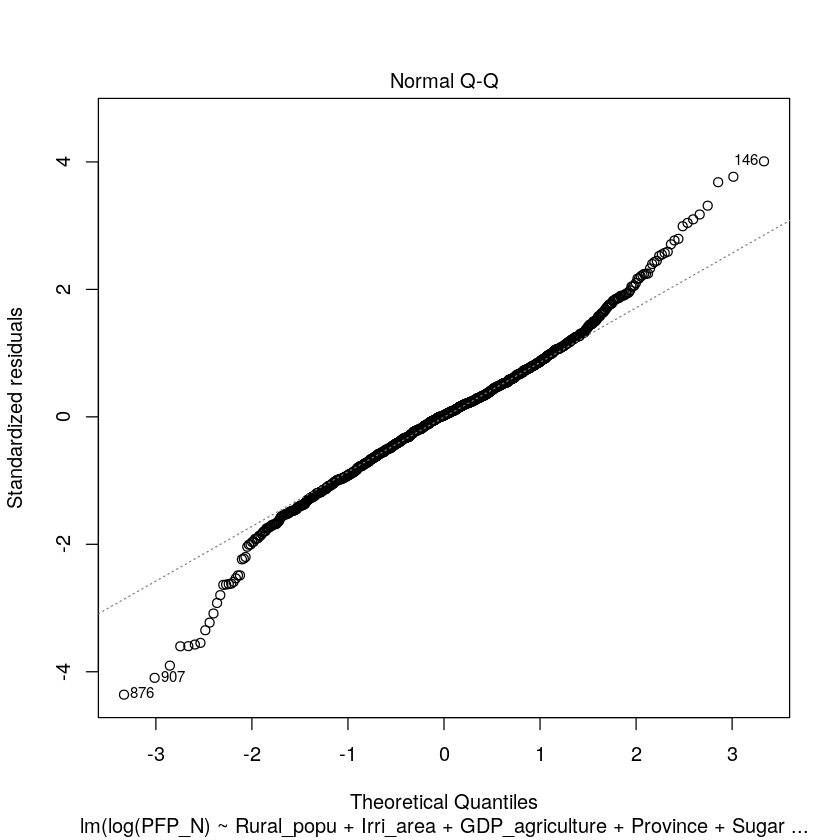

In [44]:
plot(reduced)

In [48]:
reducedformula = formula(reduced$terms)

In [54]:
fm0 = update.formula(reducedformula, "~.-Year-Province")
fm0

log(PFP_N) ~ Rural_popu + Irri_area + GDP_agriculture + Sugar + 
    Melons + Diesel_engines + Small_tractors + Oil + Towing_Farm_Machinery_S + 
    Tobacco + Vegetables + Towing_Farm_Machinery_LM + Beans + 
    Large_medium_tractors + Fiber

In [69]:
m0 = lm(fm0, data)
summary(m0)


Call:
lm(formula = fm0, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.5348 -0.1206 -0.0056  0.1080  0.9049 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               3.317e+00  3.448e-02  96.205  < 2e-16 ***
Rural_popu               -6.191e-03  3.532e-03  -1.753  0.07990 .  
Irri_area                -2.198e-01  4.593e-02  -4.785 1.93e-06 ***
GDP_agriculture          -5.612e-07  9.341e-07  -0.601  0.54805    
Sugar                     5.010e-02  2.668e-03  18.780  < 2e-16 ***
Melons                   -2.679e-03  8.555e-03  -0.313  0.75419    
Diesel_engines            7.789e-04  1.767e-04   4.409 1.14e-05 ***
Small_tractors            1.020e-03  1.689e-04   6.038 2.10e-09 ***
Oil                      -1.105e-02  1.496e-03  -7.383 2.98e-13 ***
Towing_Farm_Machinery_S  -5.719e-04  1.128e-04  -5.070 4.63e-07 ***
Tobacco                  -3.079e-02  4.399e-03  -7.001 4.34e-12 ***
Vegetables                1.862e-02  

In [56]:
partialformula = as.formula(paste("log(PFP_N)~", paste(names(data)[5:(length(names(data))-1)], collapse="+")))
partialformula

log(PFP_N) ~ Rural_popu + Irri_area + GDP_agriculture + Farmer_income + 
    Inorganic_F_output + Large_medium_tractors + Small_tractors + 
    Towing_Farm_Machinery_LM + Towing_Farm_Machinery_S + Electronic_engines + 
    Diesel_engines + Combine_harvesters + Motorized_threshing_machines + 
    Cereal + Beans + Tubers + Oil + Sugar + Fiber + Tobacco + 
    Vegetables + Tea + Orchards + Melons + Bulk_density30cm + 
    CEC30cm + Clay_content30cm + Coarse_fragments_volumetric30cm + 
    SOC_density30cm + SOC_content30cm + pH_H2O30cm + PH_KCl30cm + 
    Silt_content30cm + Sand_content30cm + Available_soil_water_h1_30cm + 
    Available_soil_water_h2_30cm + Available_soil_water_h3_30cm + 
    Available_soil_water_wilting30cm + Saturated_water_content30cm + 
    SOC_stock30cm + Depth_bedrock200cm + Absolute_depth_bedrock + 
    Histosols_probability_cumulative + Sodic_soil_grade + Acid_sub.soils_grade + 
    TAXNWRB_250m_ll.tif + local_downslope_curvature + local_upslope_curvature + 
    d

In [57]:
reduced_nopanel = step(lm(explainableformula, data=data), partialformula, direction="both", k=log(nrow(data)))

Start:  AIC=-3880.53
log(PFP_N) ~ Rural_popu + Irri_area + GDP_agriculture + Inorganic_F_output + 
    Bulk_density30cm + CEC30cm + Coarse_fragments_volumetric30cm + 
    SOC_density30cm + SOC_content30cm + pH_H2O30cm + Silt_content30cm + 
    Sand_content30cm + Available_soil_water_h2_30cm + Absolute_depth_bedrock + 
    Sodic_soil_grade + land_surface_elevation + terrain_slope + 
    surface_temperature_daytime + EVI

                                   Df Sum of Sq    RSS     AIC
+ Sugar                             1    6.0917 29.976 -4087.9
+ Gypsisols                         1    4.7391 31.328 -4036.7
+ Melons                            1    2.9809 33.087 -3973.5
+ Planosols                         1    2.8374 33.230 -3968.4
+ Oil                               1    2.4231 33.644 -3954.1
+ Available_soil_water_h1_30cm      1    2.1218 33.946 -3943.7
+ Available_soil_water_wilting30cm  1    1.9226 34.145 -3937.0
+ Available_soil_water_h3_30cm      1    1.8618 34.206 -3934.9
+ Calciso

In [58]:
summary(reduced_nopanel)


Call:
lm(formula = log(PFP_N) ~ Rural_popu + Irri_area + GDP_agriculture + 
    Inorganic_F_output + Bulk_density30cm + CEC30cm + SOC_density30cm + 
    SOC_content30cm + pH_H2O30cm + Silt_content30cm + Sand_content30cm + 
    Available_soil_water_h2_30cm + Absolute_depth_bedrock + Sodic_soil_grade + 
    land_surface_elevation + surface_temperature_daytime + EVI + 
    Sugar + Melons + Oil + PH_KCl30cm + Fiber + Diesel_engines + 
    Small_tractors + Leptosols + Stagnosols + Saturated_water_content30cm + 
    Tobacco + Calcisols + Towing_Farm_Machinery_S + Kastanozems + 
    Orchards + EXMG1.nc1 + Vegetables + Towing_Farm_Machinery_LM, 
    data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.57582 -0.07472  0.00022  0.07156  0.49920 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  -9.735e+02  1.298e+02  -7.502 1.27e-13 ***
Rural_popu                   -5.140e-02  3.686e-03 -13.944  < 2e-16 ***
I

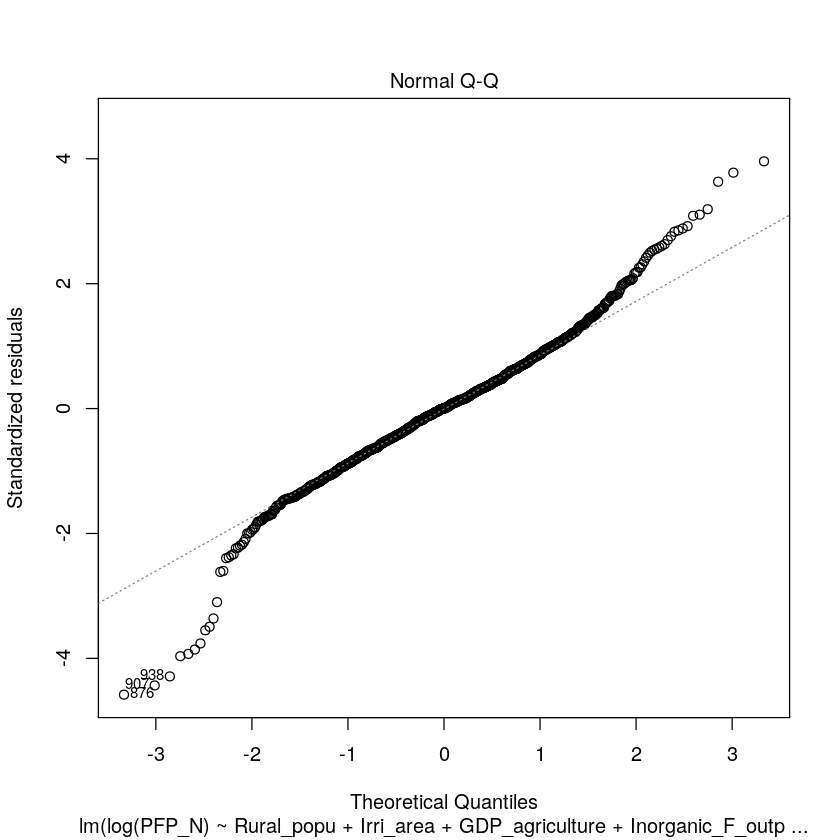

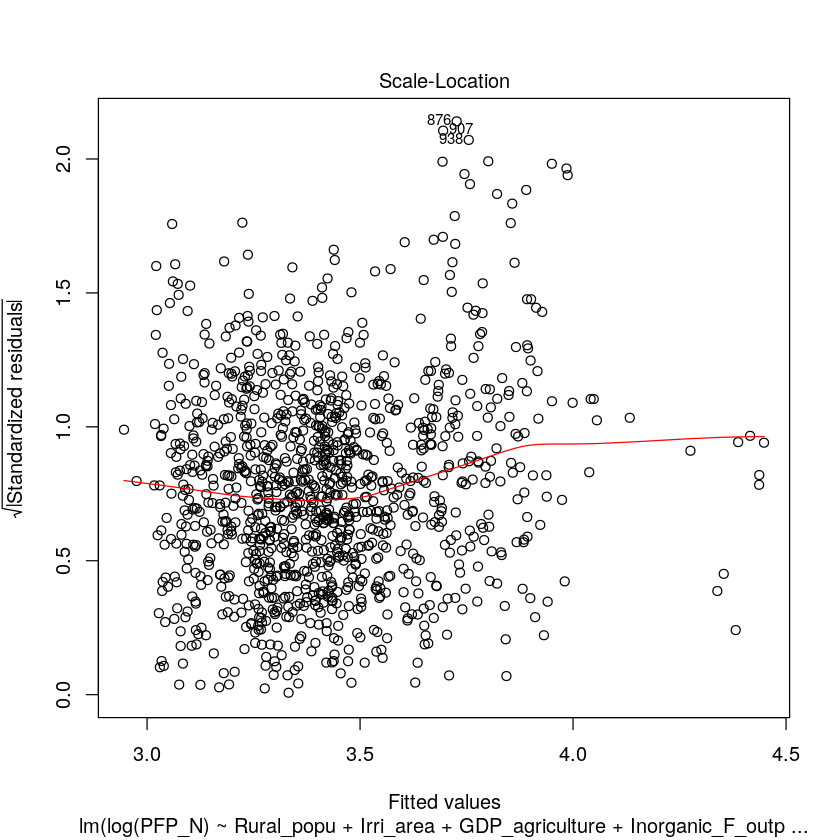

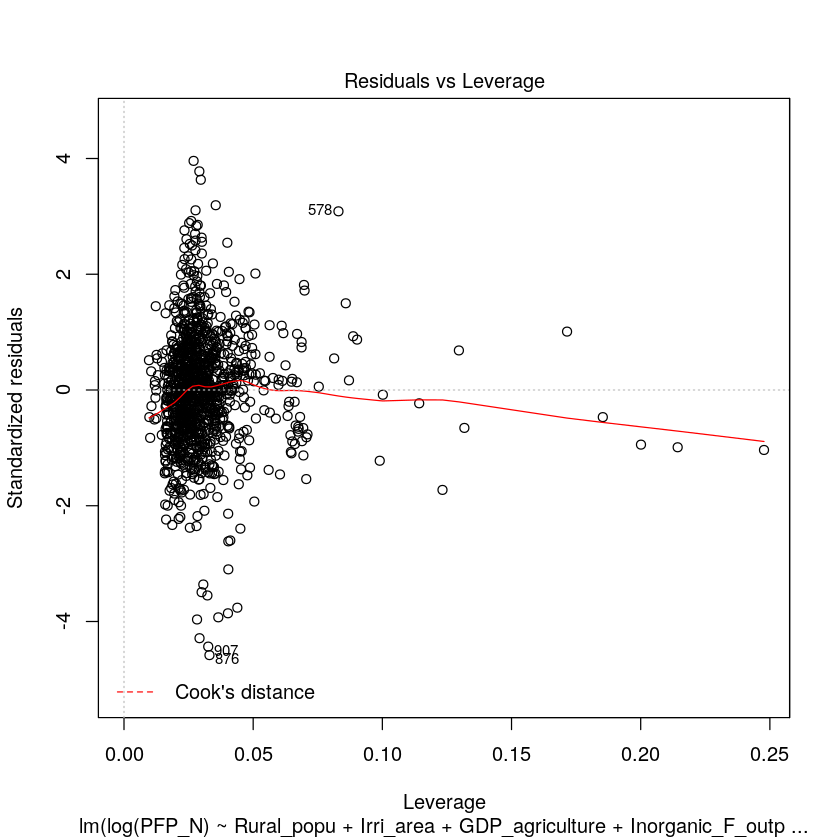

In [59]:
plot(reduced_nopanel)

In [60]:
npformula = formula(reduced_nopanel$terms)
m1f = update.formula(npformula, ~.+Year+Province)
m1 = lm(m1f, data)
summary(m1)


Call:
lm(formula = m1f, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.53629 -0.07062 -0.00075  0.07070  0.48761 

Coefficients: (20 not defined because of singularities)
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  -8.191e+02  7.248e+02  -1.130 0.258686    
Rural_popu                   -5.320e-02  4.217e-03 -12.614  < 2e-16 ***
Irri_area                    -4.270e-01  9.486e-02  -4.502 7.45e-06 ***
GDP_agriculture               1.090e-05  9.680e-07  11.260  < 2e-16 ***
Inorganic_F_output            2.224e-05  8.997e-06   2.472 0.013583 *  
Bulk_density30cm              2.978e-01  2.521e-01   1.181 0.237733    
CEC30cm                       2.104e-01  3.984e-02   5.280 1.55e-07 ***
SOC_density30cm               7.178e-03  7.489e-03   0.959 0.337993    
SOC_content30cm              -2.963e-02  1.251e-02  -2.368 0.018051 *  
pH_H2O30cm                   -6.228e+00  4.681e+00  -1.330 0.183651    
Silt_cont

In [61]:
alias(m1)

Model :
log(PFP_N) ~ Rural_popu + Irri_area + GDP_agriculture + Inorganic_F_output + 
    Bulk_density30cm + CEC30cm + SOC_density30cm + SOC_content30cm + 
    pH_H2O30cm + Silt_content30cm + Sand_content30cm + Available_soil_water_h2_30cm + 
    Absolute_depth_bedrock + Sodic_soil_grade + land_surface_elevation + 
    surface_temperature_daytime + EVI + Sugar + Melons + Oil + 
    PH_KCl30cm + Fiber + Diesel_engines + Small_tractors + Leptosols + 
    Stagnosols + Saturated_water_content30cm + Tobacco + Calcisols + 
    Towing_Farm_Machinery_S + Kastanozems + Orchards + EXMG1.nc1 + 
    Vegetables + Towing_Farm_Machinery_LM + Year + Province

Complete :
                       (Intercept)              Rural_popu              
ProvinceHenan                -2407249099/245588                        0
ProvinceHubei                     48862555/7521                        0
ProvinceHunan                      1651943/6285                        0
ProvinceInner Mongolia         -509131925/754

In [64]:
m1f = update.formula(npformula, ~.+Year+Province-Leptosols-Calcisols-Kastanozems-Sand_content30cm-surface_temperature_daytime)
m1 = lm(m1f, data)
summary(m1) # this is not workable


Call:
lm(formula = m1f, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.53629 -0.07062 -0.00075  0.07070  0.48761 

Coefficients: (15 not defined because of singularities)
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  -4.164e+02  1.914e+02  -2.175 0.029810 *  
Rural_popu                   -5.320e-02  4.217e-03 -12.614  < 2e-16 ***
Irri_area                    -4.270e-01  9.486e-02  -4.502 7.45e-06 ***
GDP_agriculture               1.090e-05  9.680e-07  11.260  < 2e-16 ***
Inorganic_F_output            2.224e-05  8.997e-06   2.472 0.013583 *  
Bulk_density30cm              1.847e-01  8.169e-02   2.261 0.023950 *  
CEC30cm                       4.473e-01  1.919e-01   2.331 0.019908 *  
SOC_density30cm              -6.232e-03  1.262e-03  -4.938 9.09e-07 ***
SOC_content30cm               2.131e-02  1.156e-02   1.845 0.065367 .  
pH_H2O30cm                   -6.890e+00  3.068e+00  -2.246 0.024906 *  
Silt_cont

In [65]:
pm0 = plm(fm0, data, index=c("Province", "Year"))

In [66]:
summary(pm0)

Oneway (individual) effect Within Model

Call:
plm(formula = fm0, data = data, index = c("Province", "Year"))

Unbalanced Panel: n = 31, T = 19-38, N = 1159

Residuals:
       Min.     1st Qu.      Median     3rd Qu.        Max. 
-0.56377471 -0.07552388 -0.00032166  0.07314427  0.50500435 

Coefficients:
                            Estimate  Std. Error  t-value  Pr(>|t|)    
Rural_popu               -5.0358e-02  4.0377e-03 -12.4720 < 2.2e-16 ***
Irri_area                -4.2454e-01  9.0766e-02  -4.6773 3.264e-06 ***
GDP_agriculture           7.1820e-06  8.3537e-07   8.5974 < 2.2e-16 ***
Sugar                     4.3570e-02  3.8445e-03  11.3331 < 2.2e-16 ***
Melons                    7.7735e-02  8.6173e-03   9.0209 < 2.2e-16 ***
Diesel_engines           -2.2312e-03  2.4445e-04  -9.1273 < 2.2e-16 ***
Small_tractors            1.0929e-03  1.5923e-04   6.8639 1.111e-11 ***
Oil                      -1.2724e-02  1.8469e-03  -6.8892 9.369e-12 ***
Towing_Farm_Machinery_S  -6.2401e-04  1.1953e-

In [71]:
summary(m0)


Call:
lm(formula = fm0, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.5348 -0.1206 -0.0056  0.1080  0.9049 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               3.317e+00  3.448e-02  96.205  < 2e-16 ***
Rural_popu               -6.191e-03  3.532e-03  -1.753  0.07990 .  
Irri_area                -2.198e-01  4.593e-02  -4.785 1.93e-06 ***
GDP_agriculture          -5.612e-07  9.341e-07  -0.601  0.54805    
Sugar                     5.010e-02  2.668e-03  18.780  < 2e-16 ***
Melons                   -2.679e-03  8.555e-03  -0.313  0.75419    
Diesel_engines            7.789e-04  1.767e-04   4.409 1.14e-05 ***
Small_tractors            1.020e-03  1.689e-04   6.038 2.10e-09 ***
Oil                      -1.105e-02  1.496e-03  -7.383 2.98e-13 ***
Towing_Farm_Machinery_S  -5.719e-04  1.128e-04  -5.070 4.63e-07 ***
Tobacco                  -3.079e-02  4.399e-03  -7.001 4.34e-12 ***
Vegetables                1.862e-02  

In [73]:
pm1 = plm(fm0, data, index=c("Province", "Year"), model="pooling")
summary(pm1)

Pooling Model

Call:
plm(formula = fm0, data = data, model = "pooling", index = c("Province", 
    "Year"))

Unbalanced Panel: n = 31, T = 19-38, N = 1159

Residuals:
      Min.    1st Qu.     Median    3rd Qu.       Max. 
-0.5348157 -0.1205712 -0.0056041  0.1079608  0.9049070 

Coefficients:
                            Estimate  Std. Error t-value  Pr(>|t|)    
(Intercept)               3.3172e+00  3.4480e-02 96.2047 < 2.2e-16 ***
Rural_popu               -6.1908e-03  3.5318e-03 -1.7528  0.079896 .  
Irri_area                -2.1978e-01  4.5931e-02 -4.7851 1.933e-06 ***
GDP_agriculture          -5.6124e-07  9.3405e-07 -0.6009  0.548052    
Sugar                     5.0098e-02  2.6676e-03 18.7803 < 2.2e-16 ***
Melons                   -2.6794e-03  8.5548e-03 -0.3132  0.754185    
Diesel_engines            7.7891e-04  1.7666e-04  4.4092 1.135e-05 ***
Small_tractors            1.0197e-03  1.6887e-04  6.0384 2.102e-09 ***
Oil                      -1.1045e-02  1.4961e-03 -7.3827 2.979e-13 

In [80]:
plmtest(pm0)


	Lagrange Multiplier Test - (Honda) for unbalanced panels

data:  fm0
normal = 47, p-value < 2.2e-16
alternative hypothesis: significant effects


In [81]:
pFtest(pm0, pm1)


	F test for individual effects

data:  fm0
F = 37.727, df1 = 30, df2 = 1113, p-value < 2.2e-16
alternative hypothesis: significant effects


In [74]:
pm2 = plm(fm0, data, index=c("Province", "Year"), model="random")
summary(pm2)

Oneway (individual) effect Random Effect Model 
   (Swamy-Arora's transformation)

Call:
plm(formula = fm0, data = data, model = "random", index = c("Province", 
    "Year"))

Unbalanced Panel: n = 31, T = 19-38, N = 1159

Effects:
                  var std.dev share
idiosyncratic 0.01677 0.12949 0.556
individual    0.01341 0.11581 0.444
theta:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.7515  0.8215  0.8215  0.8204  0.8215  0.8215 

Residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.50282 -0.07728 -0.00565  0.00008  0.07334  0.59190 

Coefficients:
                            Estimate  Std. Error  z-value  Pr(>|z|)    
(Intercept)               3.7090e+00  4.4799e-02  82.7908 < 2.2e-16 ***
Rural_popu               -4.3734e-02  3.9148e-03 -11.1715 < 2.2e-16 ***
Irri_area                -3.9648e-01  8.0564e-02  -4.9213 8.596e-07 ***
GDP_agriculture           6.1207e-06  8.3019e-07   7.3726 1.673e-13 ***
Sugar                     4.3992e-02  3.7077e-03  11.8650 

In [75]:
pm3 = plm(fm0, data, index=c("Province", "Year"), effect="time")
summary(pm3)

Oneway (time) effect Within Model

Call:
plm(formula = fm0, data = data, effect = "time", index = c("Province", 
    "Year"))

Unbalanced Panel: n = 31, T = 19-38, N = 1159

Residuals:
      Min.    1st Qu.     Median    3rd Qu.       Max. 
-0.5298387 -0.1070744 -0.0027706  0.0932433  0.8191660 

Coefficients:
                            Estimate  Std. Error t-value  Pr(>|t|)    
Rural_popu               -3.3554e-03  3.4477e-03 -0.9732   0.33065    
Irri_area                -8.0539e-02  4.3758e-02 -1.8406   0.06596 .  
GDP_agriculture          -9.0323e-06  1.6910e-06 -5.3414 1.119e-07 ***
Sugar                     5.2124e-02  2.4686e-03 21.1143 < 2.2e-16 ***
Melons                    1.0044e-02  8.0044e-03  1.2548   0.20981    
Diesel_engines            1.1305e-03  1.6395e-04  6.8955 9.010e-12 ***
Small_tractors            1.2586e-03  1.5635e-04  8.0498 2.127e-15 ***
Oil                      -9.5939e-03  1.4304e-03 -6.7070 3.164e-11 ***
Towing_Farm_Machinery_S  -5.5966e-04  1.0409e-04 

In [76]:
pm4 = plm(fm0, data, index=c("Province", "Year"), effect="twoway")
summary(pm4)

Twoways effects Within Model

Call:
plm(formula = fm0, data = data, effect = "twoway", index = c("Province", 
    "Year"))

Unbalanced Panel: n = 31, T = 19-38, N = 1159

Residuals:
      Min.    1st Qu.     Median    3rd Qu.       Max. 
-0.4807085 -0.0632479  0.0015011  0.0641681  0.4356178 

Coefficients:
                            Estimate  Std. Error  t-value  Pr(>|t|)    
Rural_popu               -4.4743e-02  4.2432e-03 -10.5446 < 2.2e-16 ***
Irri_area                -3.9538e-01  8.3338e-02  -4.7443 2.374e-06 ***
GDP_agriculture           2.7164e-06  1.6082e-06   1.6891   0.09149 .  
Sugar                     4.6059e-02  3.5618e-03  12.9312 < 2.2e-16 ***
Melons                    8.5587e-02  8.0370e-03  10.6492 < 2.2e-16 ***
Diesel_engines           -1.7646e-03  2.3000e-04  -7.6719 3.783e-14 ***
Small_tractors            1.4874e-03  1.4804e-04  10.0471 < 2.2e-16 ***
Oil                      -1.0003e-02  1.7717e-03  -5.6460 2.101e-08 ***
Towing_Farm_Machinery_S  -7.2148e-04  1.088

In [83]:
pm5 = plm(fm0, data, index=c("Country", "Year"))
summary(pm5)

Warning message in pdata.frame(data, index):
“duplicate couples (id-time) in resulting pdata.frame
 to find out which, use e.g. table(index(your_pdataframe), useNA = "ifany")”Warning message in is.pbalanced.default(index[[1]], index[[2]]):
“duplicate couples (id-time)
”

ERROR: Error in uniqval[as.character(effect), , drop = F]: incorrect number of dimensions


In [78]:
head(data)

X             PFP_N    Year Province  Rural_popu Irri_area GDP_agriculture
1 1978Anhui     38.85465 1978 Anhui     5.144231   0.2940456  729.1258      
2 1978Beijing   34.83250 1978 Beijing   5.439378   0.4864692 3423.6337      
3 1978Fujian    44.11323 1978 Fujian    7.374163   0.3006588  983.6866      
4 1978Gansu     21.24887 1978 Gansu     4.520054   0.2401786  508.3934      
5 1978Guangdong 38.08682 1978 Guangdong 6.297277   0.2872174  798.3183      
6 1978Guangxi   35.78967 1978 Guangxi   5.581323   0.2700360  815.4309      
  Farmer_income Inorganic_F_output Large_medium_tractors ⋯ Calcisols Cryosols  
1 184.82         32.37834          1.917067              ⋯ 10.379076 0.16302126
2 290.46        145.20193          7.926317              ⋯  1.179766 0.01222295
3 171.74         46.01227          2.076827              ⋯ 16.674904 0.36711958
4 153.33         42.81208          3.896744              ⋯  4.648438 0.21465848
5 274.37         48.99717          2.406634              ⋯  6.359974 0.33896829
6 173.68         34.33587          3.749220              ⋯  9.762604 0.49623444
  Fluvisols  Leptosols Lixisols  Phaeozems  Umbrisols  Stagnosols Durisols
1 0.08926932 14.831737  6.052155 13.8230776 0.02692309 4.2122371  3.661931
2 0.46807018 10.999683 30.497307  7.9885519 0.32267867 0.1850711  2.876233
3 0.06521634  2.428367  8.037215  0.7639250 0.08504686 1.1649576  5.879578
4 7.49200999  6.429372 17.396262  2.2732878 0.02366767 0.3898247  2.239064
5 0.06547605  8.821494  6.325334  1.7032188 0.04174332 1.9523546  4.023609
6 0.12975460  4.502822  6.561313  0.5694741 0.08108143 0.9923823  5.263071
  Country
1 China  
2 China  
3 China  
4 China  
5 China  
6 China

In [86]:
pm_tr = plm(fm0, data, index=c("Province", "Year"), effect = "time", model="random")
summary(pm_tr)

Oneway (time) effect Random Effect Model 
   (Swamy-Arora's transformation)

Call:
plm(formula = fm0, data = data, effect = "time", model = "random", 
    index = c("Province", "Year"))

Unbalanced Panel: n = 31, T = 19-38, N = 1159

Effects:
                  var std.dev share
idiosyncratic 0.02755 0.16597     1
time          0.00000 0.00000     0
theta:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0       0       0       0       0 

Residuals:
      Min.    1st Qu.     Median    3rd Qu.       Max. 
-0.5348157 -0.1205712 -0.0056041  0.1079608  0.9049070 

Coefficients:
                            Estimate  Std. Error z-value  Pr(>|z|)    
(Intercept)               3.3172e+00  3.4480e-02 96.2047 < 2.2e-16 ***
Rural_popu               -6.1908e-03  3.5318e-03 -1.7528  0.079628 .  
Irri_area                -2.1978e-01  4.5931e-02 -4.7851 1.709e-06 ***
GDP_agriculture          -5.6124e-07  9.3405e-07 -0.6009  0.547932    
Sugar                     5.0098e-02  2.6676e-03 1

In [87]:
pm_tf = plm(fm0, data, index=c("Province", "Year"), effect = "time")
summary(pm_tf)

Oneway (time) effect Within Model

Call:
plm(formula = fm0, data = data, effect = "time", index = c("Province", 
    "Year"))

Unbalanced Panel: n = 31, T = 19-38, N = 1159

Residuals:
      Min.    1st Qu.     Median    3rd Qu.       Max. 
-0.5298387 -0.1070744 -0.0027706  0.0932433  0.8191660 

Coefficients:
                            Estimate  Std. Error t-value  Pr(>|t|)    
Rural_popu               -3.3554e-03  3.4477e-03 -0.9732   0.33065    
Irri_area                -8.0539e-02  4.3758e-02 -1.8406   0.06596 .  
GDP_agriculture          -9.0323e-06  1.6910e-06 -5.3414 1.119e-07 ***
Sugar                     5.2124e-02  2.4686e-03 21.1143 < 2.2e-16 ***
Melons                    1.0044e-02  8.0044e-03  1.2548   0.20981    
Diesel_engines            1.1305e-03  1.6395e-04  6.8955 9.010e-12 ***
Small_tractors            1.2586e-03  1.5635e-04  8.0498 2.127e-15 ***
Oil                      -9.5939e-03  1.4304e-03 -6.7070 3.164e-11 ***
Towing_Farm_Machinery_S  -5.5966e-04  1.0409e-04 

In [90]:
phtest(pm_tf, pm_tr)


	Hausman Test

data:  fm0
chisq = 268.53, df = 15, p-value < 2.2e-16
alternative hypothesis: one model is inconsistent


In [91]:
pm_tp = plm(fm0, data, index=c("Province", "Year"), effect = "time", model = "pooling")
summary(pm_tp)

Pooling Model

Call:
plm(formula = fm0, data = data, effect = "time", model = "pooling", 
    index = c("Province", "Year"))

Unbalanced Panel: n = 31, T = 19-38, N = 1159

Residuals:
      Min.    1st Qu.     Median    3rd Qu.       Max. 
-0.5348157 -0.1205712 -0.0056041  0.1079608  0.9049070 

Coefficients:
                            Estimate  Std. Error t-value  Pr(>|t|)    
(Intercept)               3.3172e+00  3.4480e-02 96.2047 < 2.2e-16 ***
Rural_popu               -6.1908e-03  3.5318e-03 -1.7528  0.079896 .  
Irri_area                -2.1978e-01  4.5931e-02 -4.7851 1.933e-06 ***
GDP_agriculture          -5.6124e-07  9.3405e-07 -0.6009  0.548052    
Sugar                     5.0098e-02  2.6676e-03 18.7803 < 2.2e-16 ***
Melons                   -2.6794e-03  8.5548e-03 -0.3132  0.754185    
Diesel_engines            7.7891e-04  1.7666e-04  4.4092 1.135e-05 ***
Small_tractors            1.0197e-03  1.6887e-04  6.0384 2.102e-09 ***
Oil                      -1.1045e-02  1.4961e-03 -

In [92]:
summary(pm1)

Pooling Model

Call:
plm(formula = fm0, data = data, model = "pooling", index = c("Province", 
    "Year"))

Unbalanced Panel: n = 31, T = 19-38, N = 1159

Residuals:
      Min.    1st Qu.     Median    3rd Qu.       Max. 
-0.5348157 -0.1205712 -0.0056041  0.1079608  0.9049070 

Coefficients:
                            Estimate  Std. Error t-value  Pr(>|t|)    
(Intercept)               3.3172e+00  3.4480e-02 96.2047 < 2.2e-16 ***
Rural_popu               -6.1908e-03  3.5318e-03 -1.7528  0.079896 .  
Irri_area                -2.1978e-01  4.5931e-02 -4.7851 1.933e-06 ***
GDP_agriculture          -5.6124e-07  9.3405e-07 -0.6009  0.548052    
Sugar                     5.0098e-02  2.6676e-03 18.7803 < 2.2e-16 ***
Melons                   -2.6794e-03  8.5548e-03 -0.3132  0.754185    
Diesel_engines            7.7891e-04  1.7666e-04  4.4092 1.135e-05 ***
Small_tractors            1.0197e-03  1.6887e-04  6.0384 2.102e-09 ***
Oil                      -1.1045e-02  1.4961e-03 -7.3827 2.979e-13 

In [93]:
all.equal(pm_tp, pm1)

[1] "Component “args”: Component “effect”: 1 string mismatch"     
[2] "Component “call”: target, current do not match when deparsed"

In [132]:
data[data$Province=="Beijing",50:60]

TAXNWRB_250m_ll.tif local_downslope_curvature local_upslope_curvature
2    51.15243            -0.2664952                0.2149301              
32   51.15243            -0.2664952                0.2149301              
62   51.15243            -0.2664952                0.2149301              
92   51.15243            -0.2664952                0.2149301              
122  51.15243            -0.2664952                0.2149301              
152  51.15243            -0.2664952                0.2149301              
182  51.15243            -0.2664952                0.2149301              
212  51.15243            -0.2664952                0.2149301              
242  51.15243            -0.2664952                0.2149301              
272  51.15243            -0.2664952                0.2149301              
302  51.15243            -0.2664952                0.2149301              
332  51.15243            -0.2664952                0.2149301              
362  51.15243            -0.2664952                0.2149301              
392  51.15243            -0.2664952                0.2149301              
422  51.15243            -0.2664952                0.2149301              
452  51.15243            -0.2664952                0.2149301              
482  51.15243            -0.2664952                0.2149301              
512  51.15243            -0.2664952                0.2149301              
542  51.15243            -0.2664952                0.2149301              
572  51.15243            -0.2664952                0.2149301              
603  51.15243            -0.2664952                0.2149301              
634  51.15243            -0.2664952                0.2149301              
665  51.15243            -0.2664952                0.2149301              
696  51.15243            -0.2664952                0.2149301              
727  51.15243            -0.2664952                0.2149301              
758  51.15243            -0.2664952                0.2149301              
789  51.15243            -0.2664952                0.2149301              
820  51.15243            -0.2664952                0.2149301              
851  51.15243            -0.2664952                0.2149301              
882  51.15243            -0.2664952                0.2149301              
913  51.15243            -0.2664952                0.2149301              
944  51.15243            -0.2664952                0.2149301              
975  51.15243            -0.2664952                0.2149301              
1006 51.15243            -0.2664952                0.2149301              
1037 51.15243            -0.2664952                0.2149301              
1068 51.15243            -0.2664952                0.2149301              
1099 51.15243            -0.2664952                0.2149301              
1130 51.15243            -0.2664952                0.2149301              
     downslope_curvature land_surface_elevation terrain_slope
2    -0.2278399          358.2818               0.1178036    
32   -0.2278399          358.2818               0.1178036    
62   -0.2278399          358.2818               0.1178036    
92   -0.2278399          358.2818               0.1178036    
122  -0.2278399          358.2818               0.1178036    
152  -0.2278399          358.2818               0.1178036    
182  -0.2278399          358.2818               0.1178036    
212  -0.2278399          358.2818               0.1178036    
242  -0.2278399          358.2818               0.1178036    
272  -0.2278399          358.2818               0.1178036    
302  -0.2278399          358.2818               0.1178036    
332  -0.2278399          358.2818               0.1178036    
362  -0.2278399          358.2818               0.1178036    
392  -0.2278399          358.2818               0.1178036    
422  -0.2278399          358.2818               0.1178036    
452  -0.2278399          358.2818               0.1178036    
482  -0.2278399          3

In [103]:
step(pm0)

ERROR: Error in UseMethod("extractAIC"): no applicable method for 'extractAIC' applied to an object of class "c('plm', 'panelmodel')"


In [105]:
predict(pm0)

Anhui          Anhui          Anhui          Anhui          Anhui 
  0.0125880983  -0.0169881872  -0.0396662312  -0.0541488310  -0.0750208902 
         Anhui          Anhui          Anhui          Anhui          Anhui 
 -0.0368354835   0.0079746036   0.1959730996   0.0784955100   0.0659426091 
         Anhui          Anhui          Anhui          Anhui          Anhui 
  0.1062706564   0.0575592517   0.0395877614  -0.0365878092  -0.0056206963 
         Anhui          Anhui          Anhui          Anhui          Anhui 
  0.0503989716   0.0021529273  -0.0279244976  -0.0087293784   0.0028112097 
         Anhui          Anhui          Anhui          Anhui          Anhui 
 -0.0213240782  -0.0518294514  -0.0622748509  -0.0393007365  -0.0456725348 
         Anhui          Anhui          Anhui          Anhui          Anhui 
 -0.0529297454  -0.0755820498  -0.0774225837  -0.0449236382  -0.0183188604 
         Anhui          Anhui          Anhui          Anhui          Anhui 
 -0.0215705488  -0.0231874551   0.0052673642   0.0312469131   0.0435691606 
         Anhui          Anhui          Anhui        Beijing        Beijing 
  0.0266190396   0.0440891597   0.0653122020  -0.1034538834  -0.0781901492 
       Beijing        Beijing        Beijing        Beijing        Beijing 
 -0.0846037019  -0.0523944848  -0.0195335679  -0.0467023768  -0.0024333836 
       Beijing        Beijing        Beijing        Beijing        Beijing 
  0.0163716675   0.0388576975   0.0343840035   0.0646737725   0.0579338017 
       Beijing        Beijing        Beijing        Beijing        Beijing 
  0.0396408238   0.0378869826   0.0501815329   0.0569596514   0.0862780814 
       Beijing        Beijing        Beijing        Beijing        Beijing 
  0.0699687169   0.0480263218   0.0444767219   0.0589613422   0.1010136610 
       Beijing        Beijing        Beijing        Beijing        Beijing 
  0.1035339105   0.1055104175   0.0721318587   0.2231736321   0.1746504395 
       Beijing        Beijing        Beijing        Beijing        Beijing 
  0.1330970594   0.0186949977   0.0144398208  -0.1251410503  -0.1230630905 
       Beijing        Beijing        Beijing        Beijing        Beijing 
 -0.1131513987  -0.0839920787  -0.1388348315  -0.1265489531  -0.2444720225 
       Beijing      Chongqing      Chongqing      Chongqing      Chongqing 
 -0.3083319419  -0.0828607338  -0.0531800273  -0.0649451785  -0.0755307932 
     Chongqing      Chongqing      Chongqing      Chongqing      Chongqing 
 -0.0547410403  -0.0629111563  -0.0661562927  -0.0381420749  -0.0246118234 
     Chongqing      Chongqing      Chongqing      Chongqing      Chongqing 
 -0.0366515432  -0.0037419298   0.0086500632   0.0173871480   0.0473683421 
     Chongqing      Chongqing      Chongqing      Chongqing      Chongqing 
  0.0657336593   0.0810455351   0.1000272353   0.1160277499   0.1272328604 
        Fujian         Fujian         Fujian         Fujian         Fujian 
 -0.0724875869  -0.0930872434  -0.1083095606  -0.1079523381  -0.1365737069 
        Fujian         Fujian         Fujian         Fujian         Fujian 
 -0.1257143529  -0.0920121048  -0.0472593258  -0.0561688170  -0.0428003343 
        Fujian         Fujian         Fujian         Fujian         Fujian 
 -0.0435126978  -0.0387483676  -0.0391413734  -0.0263853031  -0.0171939546 
        Fujian         Fujian         Fujian         Fujian         Fujian 
 -0.0716043731   0.0169124919   0.0455401899   0.0586049426   0.0413937978 
        Fujian         Fujian         Fujian         Fujian         Fujian 
  0.0604483849   0.0465316660   0.0239448195   0.0260541021   0.0100932908 
        Fujian         Fujian         Fujian         Fujian         Fujian 
  0.0116605101   0.0112062066   0.0072602335  -0.0207802658  -0.0094449646 
        Fujian         Fujian         Fujian         Fujian         Fujian 
  0.0113425986   0.0261198901   0.0653705815   0.0973200487   0.1176433985 
        Fujian         Fujian         Fujian          Gan

In [106]:
library(nlme)

In [109]:
lm0 = lme(fm0, data, random=~1|Province)

In [110]:
summary(lm0)

Linear mixed-effects model fit by REML
 Data: data 
        AIC       BIC   logLik
  -1106.013 -1015.268 571.0065

Random effects:
 Formula: ~1 | Province
        (Intercept)  Residual
StdDev:    0.189856 0.1295143

Fixed effects: list(fm0) 
                             Value  Std.Error   DF   t-value p-value
(Intercept)               3.738925 0.05268013 1113  70.97410  0.0000
Rural_popu               -0.047590 0.00395483 1113 -12.03350  0.0000
Irri_area                -0.412318 0.08557772 1113  -4.81806  0.0000
GDP_agriculture           0.000007 0.00000083 1113   8.15478  0.0000
Sugar                     0.043735 0.00376042 1113  11.63029  0.0000
Melons                    0.073937 0.00853140 1113   8.66644  0.0000
Diesel_engines           -0.002088 0.00024019 1113  -8.69380  0.0000
Small_tractors            0.001086 0.00015831 1113   6.86052  0.0000
Oil                      -0.012909 0.00181474 1113  -7.11334  0.0000
Towing_Farm_Machinery_S  -0.000614 0.00011833 1113  -5.19052  0.0000

In [115]:
m0g = gls(fm0, data, method = "REML")
summary(m0g)

Generalized least squares fit by REML
  Model: fm0 
  Data: data 
        AIC       BIC   logLik
  -454.4354 -368.7314 244.2177

Coefficients:
                             Value  Std.Error  t-value p-value
(Intercept)               3.317163 0.03448026 96.20470  0.0000
Rural_popu               -0.006191 0.00353183 -1.75285  0.0799
Irri_area                -0.219784 0.04593119 -4.78508  0.0000
GDP_agriculture          -0.000001 0.00000093 -0.60086  0.5481
Sugar                     0.050098 0.00266761 18.78027  0.0000
Melons                   -0.002679 0.00855476 -0.31320  0.7542
Diesel_engines            0.000779 0.00017666  4.40916  0.0000
Small_tractors            0.001020 0.00016887  6.03838  0.0000
Oil                      -0.011045 0.00149609 -7.38275  0.0000
Towing_Farm_Machinery_S  -0.000572 0.00011279 -5.07013  0.0000
Tobacco                  -0.030792 0.00439853 -7.00056  0.0000
Vegetables                0.018621 0.00173455 10.73558  0.0000
Towing_Farm_Machinery_LM  0.004474 0.0

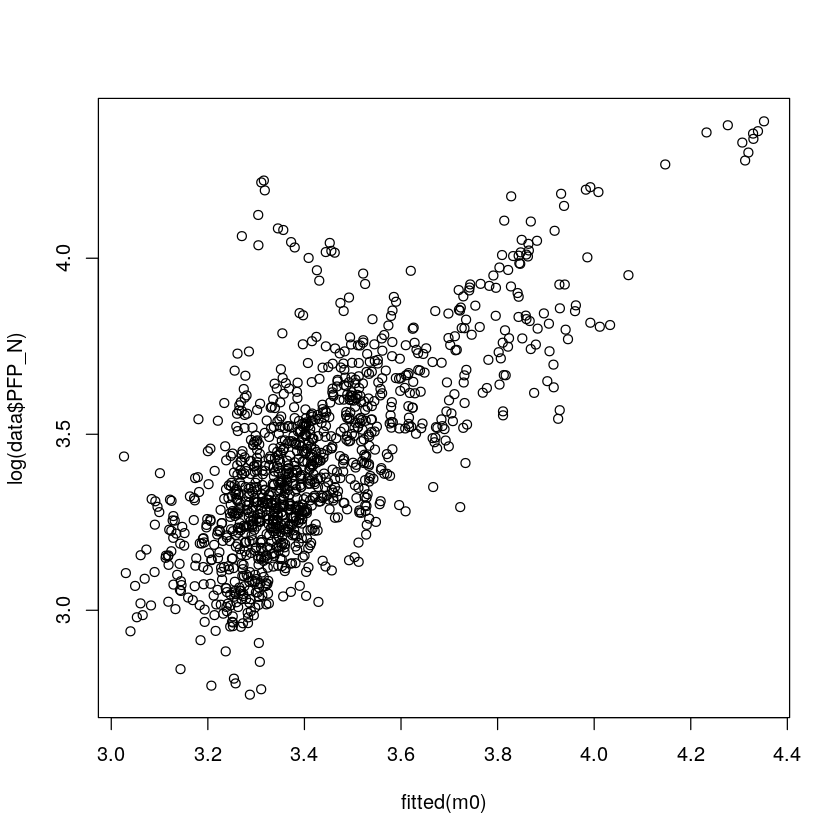

In [119]:
plot(log(data$PFP_N)~fitted(m0))

In [120]:
plot(log(data$PFP_N)~fitted(m0g))

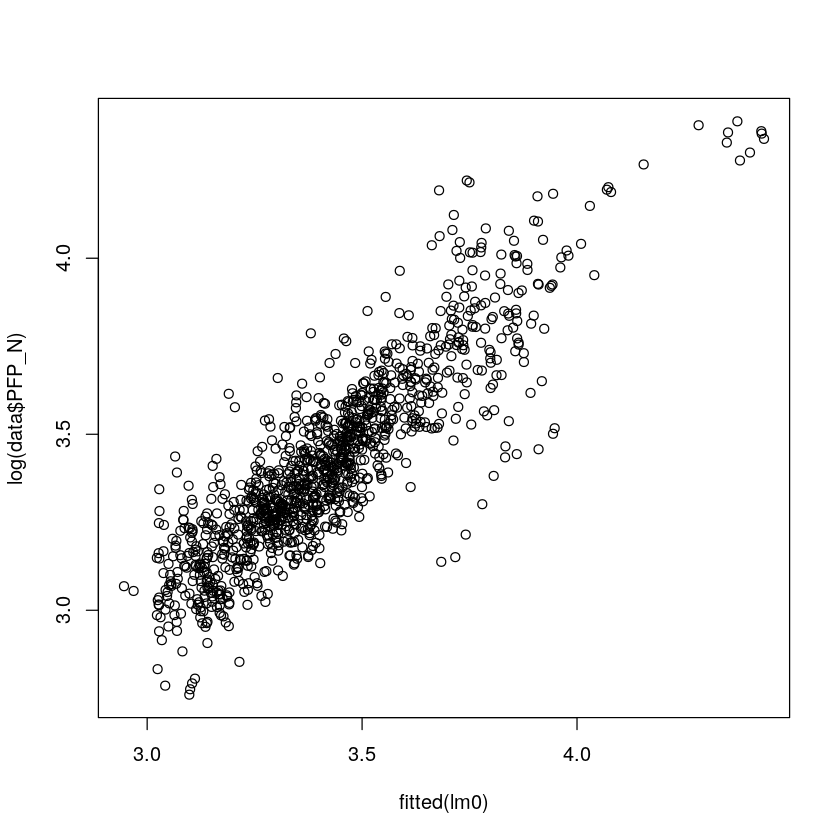

In [118]:
plot(log(data$PFP_N)~fitted(lm0))

In [121]:
AIC(m0g, lm0)

df AIC       
m0g 17  -454.4354
lm0 18 -1106.0131

In [122]:
plot(log(data$PFP_N)~fitted(reduced))

In [123]:
m1g = gls(reducedformula, data, method = "REML")
summary(m1g)

Generalized least squares fit by REML
  Model: reducedformula 
  Data: data 
        AIC       BIC   logLik
  -1110.493 -869.8248 603.2464

Coefficients:
                             Value Std.Error    t-value p-value
(Intercept)              23.538046 2.0967278  11.226086  0.0000
Rural_popu               -0.058082 0.0039712 -14.626046  0.0000
Irri_area                -0.333479 0.0878904  -3.794258  0.0002
GDP_agriculture           0.000013 0.0000010  12.786495  0.0000
ProvinceBeijing           0.177077 0.0488513   3.624826  0.0003
ProvinceChongqing         0.130573 0.0474366   2.752590  0.0060
ProvinceFujian            0.155154 0.0425857   3.643324  0.0003
ProvinceGansu            -0.130146 0.0366339  -3.552615  0.0004
ProvinceGuangdong         0.255431 0.0434116   5.883939  0.0000
ProvinceGuangxi           0.280318 0.0469055   5.976232  0.0000
ProvinceGuizhou           0.175073 0.0510757   3.427718  0.0006
ProvinceHainan           -0.100672 0.0480016  -2.097274  0.0362
ProvinceHebei 

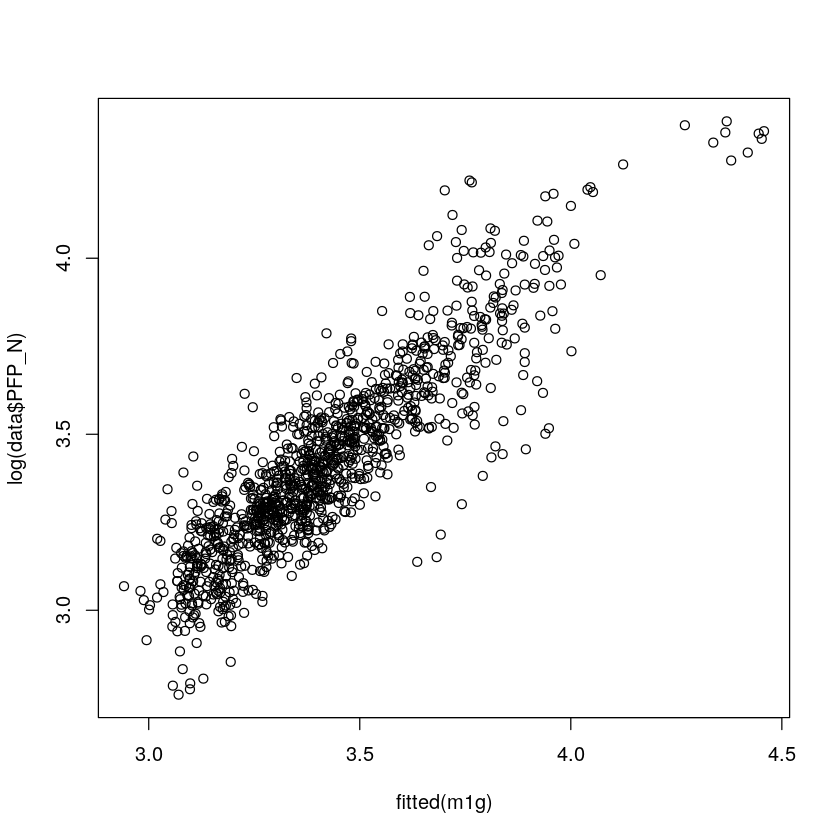

In [124]:
plot(log(data$PFP_N)~fitted(m1g))

In [125]:
AIC(m0g, lm0, m1g)

Warning message in AIC.default(m0g, lm0, m1g):
“models are not all fitted to the same number of observations”

df AIC       
m0g 17  -454.4354
lm0 18 -1106.0131
m1g 48 -1110.4927

In [126]:
lm1 = lme(reducedformula, data, random=~1|Province)

In [127]:
AIC(m1g, lm1)

df AIC      
m1g 48 -1110.493
lm1 49 -1108.493